# **Programming for Applied Deep Learning (GKSG008-01)**
> ### **20181202 김수미**
> ### MNIST Experiment(3) (Based on 11/4 Lecture)

> ### **+) Data augmentation : Add 'torchvision.transforms.RandomRotation(degrees)' to produce a dataset and try to obtain a training result of a better test accuracy.**

> **(Data augmentation is one of the most important component of deep neural network training to obtain higher accuracy in computer vision)**

**1. Import libraries and define function**

In [ ]:
pip install d2l

In [2]:
import torch
import torchvision
import numpy as np
import matplotlib.pyplot as plt
import torchvision.transforms as transforms
import torch.utils.data as data
import cv2

import warnings
warnings.filterwarnings('ignore')

from d2l.torch import *
from torch import nn
from d2l import torch as d2l
from torch.utils.data import DataLoader
from google.colab.patches import cv2_imshow

**2.  Add torchvision.transforms.RandomRotation(degrees)**

In [3]:
transformOpt = transforms.Compose([
            transforms.RandomRotation(degrees=(-90, 90)),
            transforms.ToTensor()])

def load_data_mnist(batch_size, resize=None):
    trans = [transforms.ToTensor()]
    if resize:
      trans.insert(0,transforms.Resize(resize))
    trans = transforms.Compose(trans)
    mnist_train = torchvision.datasets.MNIST(root="../data",train=True,transform=transformOpt,download=True)
    mnist_test = torchvision.datasets.MNIST(root="../data",train=False,transform=transformOpt,download=True)
    return(data.DataLoader(mnist_train,batch_size,shuffle=True,num_workers=4),
           data.DataLoader(mnist_test,batch_size,shuffle=False,num_workers=4))

In [4]:
def my_train_ch3(net, train_iter, test_iter, loss, num_epochs, updater):
    animator = Animator(xlabel='epoch', xlim=[1, num_epochs], ylim=[0.3, 0.9],
                        legend=['train loss', 'train acc', 'test acc'])
    for epoch in range(num_epochs):
        train_metrics = train_epoch_ch3(net, train_iter, loss, updater)
        test_acc = evaluate_accuracy(net, test_iter)
        animator.add(epoch + 1, train_metrics + (test_acc,))
    train_loss, train_acc = train_metrics
    
    print("Final train loss : {:.4f}".format(train_loss))

**3. See how data have been transformed**

In [5]:
batch_size = 128
train_iter, test_iter = load_data_mnist(batch_size)

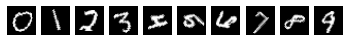

In [6]:
label = 0; images = []
for data in train_iter:
  x,y = data
  if y[0].item() == label:
    image = x[0,0]
    image = image.numpy()
    images.append(image)
    label += 1
  if label == 10: break

fig = plt.figure()
rows,cols = 1,10
for i in range(10):
  ax1 = fig.add_subplot(rows, cols, i+1)
  ax1.imshow(images[i], cmap='gray')
  ax1.axis("off")
plt.show()

**4. Define model and train it**

In [7]:
net = nn.Sequential(nn.Flatten(), nn.Linear(784, 10))
def init_weights(m):
    if type(m) == nn.Linear:
        nn.init.normal_(m.weight, std=0.01)
net.apply(init_weights);

loss = nn.CrossEntropyLoss()
trainer = torch.optim.SGD(net.parameters(), lr=0.4)

Final train loss : 0.9522


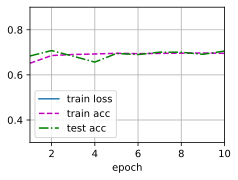

In [8]:
# batch_size = 128 / learning rate = 0.4 / epochs = 10
num_epochs = 10
my_train_ch3(net, train_iter, test_iter, loss, num_epochs, trainer)

**5. Check Training Results**

In [9]:
# Test Accuracy
for x,y in test_iter:
  pred = net(x)
  test_pred = torch.argmax(pred, dim=1)
  break

result = (y == test_pred)
accuracy = result.sum()/len(result)
print('>> Test Accuracy : ',accuracy.item()*100,'%')

# Train Accuracy
for x,y in train_iter:
  pred = net(x)
  train_pred = torch.argmax(pred, dim=1)
  break

result = (y == train_pred)
accuracy = result.sum()/len(result)
print('>> Train Accuracy : ',accuracy.item()*100,'%')

>> Test Accuracy :  68.75 %
>> Train Accuracy :  64.0625 %


**6. Check My Data Accuracy**

In [10]:
my_nums = []
my_labs = [0,1,2,3,4,5,6,7,8,9]
for i in range(10):
  img = cv2.imread('{num}.jpg'.format(num=i),cv2.IMREAD_GRAYSCALE)
  img = cv2.resize(img, (28,28))
  img = np.reshape(img,(1,28,28))
  my_nums.append(img)

my_nums = np.array(my_nums)
my_nums = torch.Tensor(my_nums)
my_labs = np.array(my_labs)
my_labs = torch.Tensor(my_labs)

In [11]:
# My Data Accuracy
pred = net(my_nums)
my_pred = torch.argmax(pred, dim=1)

result = (my_labs == my_pred)
accuracy = result.sum()/len(result)
arr = my_labs.detach().numpy()
arr = arr.astype('int32')
print('< True Label >',arr)
print('\n< Prediction >',my_pred.detach().numpy())
print('\n>> My Data Accuracy : ',accuracy.item()*100,'%')

< True Label > [0 1 2 3 4 5 6 7 8 9]

< Prediction > [6 9 9 3 8 6 6 1 8 8]

>> My Data Accuracy :  30.000001192092896 %
